## Métodos Numéricos para Resolver EDOs

---

Este notebook compara tres métodos numéricos para resolver ecuaciones diferenciales ordinarias (EDOs):
1. **Método de Euler** (Orden 1)
2. **Método de Heun** (Runge-Kutta de Orden 2)
3. **Método del Punto Medio** (RK2 alternativo)

Utilizaremos la EDO:
$$
\frac{dy}{dx} = y \cos(x), \quad y(0) = 1
$$
cuya solución exacta es $y(x) = e^{\sin(x)}$.

---


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la EDO: dy/dx = y * cos(x)
def f(x, y):
    return y * np.cos(x)

# Solución exacta: y(x) = e^(sin(x))
def exact_solution(x):
    return np.exp(np.sin(x))

### 📉 Método de Euler

$$
y_{i+1} = y_i + h \cdot f(x_i, y_i)
$$

In [19]:
def euler(f, x0, y0, h, steps):
    x = np.zeros(steps + 1)
    y = np.zeros(steps + 1)
    x[0], y[0] = x0, y0
    
    for i in range(steps):
        y[i+1] = y[i] + h * f(x[i], y[i])
        x[i+1] = x[i] + h
    
    return x, y

### 📉 Método de Heun

$$
y_{i+1} = y_i + \frac{h}{2} \cdot \left( f(x_i, y_i) + f(x_{i+1}, y^{0}_{i+1}) \right)
$$


In [20]:
def heun(f, x0, y0, h, steps):
    x = np.zeros(steps + 1)
    y = np.zeros(steps + 1)
    x[0], y[0] = x0, y0
    
    for i in range(steps):
        k1 = f(x[i], y[i])
        k2 = f(x[i] + h, y[i] + h * k1)
        y[i+1] = y[i] + (h / 2) * (k1 + k2)
        x[i+1] = x[i] + h
    
    return x, y

### 📉 Método del Punto Medio

$$
y_{i+1} = y_i + h \cdot f(x_{i+\frac{1}{2}}, y_{i+\frac{1}{2}})
$$


In [21]:
def punto_medio(f, x0, y0, h, steps):
    x = np.zeros(steps + 1)
    y = np.zeros(steps + 1)
    x[0], y[0] = x0, y0
    
    for i in range(steps):
        k1 = f(x[i], y[i])
        k2 = f(x[i] + h/2, y[i] + (h/2) * k1)
        y[i+1] = y[i] + h * k2
        x[i+1] = x[i] + h
    
    return x, y

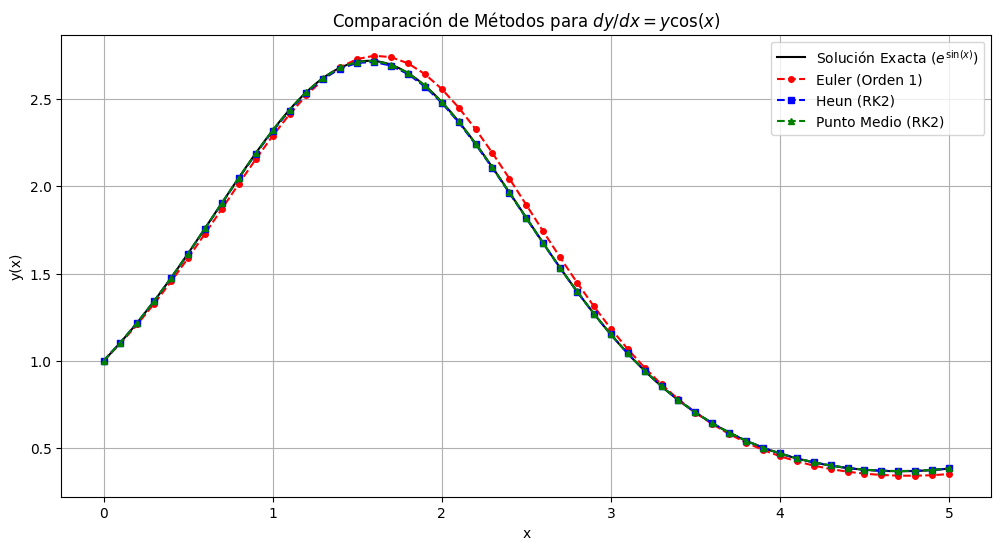

In [22]:
# Parámetros
x0, y0 = 0, 1 
h = 0.1         
steps = 50       

# Soluciones numéricas
x_euler, y_euler = euler(f, x0, y0, h, steps)
x_heun, y_heun = heun(f, x0, y0, h, steps)
x_pm, y_pm = punto_medio(f, x0, y0, h, steps)

# Solución exacta
x_exact = np.linspace(x0, x0 + h * steps, 1000)
y_exact = exact_solution(x_exact)

# Gráfico
plt.figure(figsize=(12, 6))
plt.plot(x_exact, y_exact, 'k-', label='Solución Exacta ($e^{\sin(x)}$)')
plt.plot(x_euler, y_euler, 'ro--', label='Euler (Orden 1)', markersize=4)
plt.plot(x_heun, y_heun, 'bs--', label='Heun (RK2)', markersize=4)
plt.plot(x_pm, y_pm, 'g^--', label='Punto Medio (RK2)', markersize=4)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Comparación de Métodos para $dy/dx = y \cos(x)$')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
error_euler = np.abs(y_euler[-1] - exact_solution(x_euler[-1]))
error_heun = np.abs(y_heun[-1] - exact_solution(x_heun[-1]))
error_pm = np.abs(y_pm[-1] - exact_solution(x_pm[-1]))

print(f"Error en x = {x_euler[-1]:.1f}:")
print(f"- Euler: {error_euler:.6f}")
print(f"- Heun: {error_heun:.6f}")
print(f"- Punto Medio: {error_pm:.6f}")

Error en x = 5.0:
- Euler: 0.031736
- Heun: 0.000688
- Punto Medio: 0.000711
